<a href="https://colab.research.google.com/github/kevinajordan/DS-Training/blob/master/05_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function. Logistic regression is a probabilistic classifier.

A logistic regression model or, more specifically, its weight vector w is learned from the training data, with the goal of predicting a positive sample as close to 1 as possible and predicting a negative sample as close to 0 as possible. In mathematical language, the weights are trained so as to minimize the cost defined as the mean squared error (MSE), which measures the average of squares of difference between the truth and the prediction.

Properties of Logistic Regression:

* The dependent variable in logistic regression follows Bernoulli Distribution.
* Estimation is done through maximum likelihood.
* Output is the probability of belonging to one class or another using the logistic function (aka sigmoid function) 

### Maximum Likelihood Estimation Vs. Least Square Method

The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. 

### Sigmoid Function
The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. For example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image4_gw5mmv.png)


### Types of Logistic Regression:

* Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
* Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
* Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [0]:
# Visualizing the sigmoid function
import numpy as np
def sigmoid(input):
  return 1.0 / (1 + np.exp(-input))

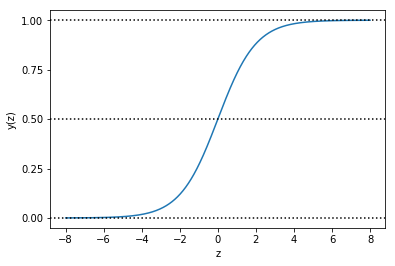

In [0]:
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
import matplotlib.pyplot as plt
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

In the S-shaped curve, all inputs are transformed into the range from 0 to 1. For positive inputs, a greater value results in an output closer to 1; for negative inputs, a smaller value generates an output closer to 0; when the input is 0, the output is the midpoint, 0.5.

The job of the learning algorithm is to discover the best values for the coefficients ($\beta_0$, $\beta_1$, $\beta_2$ ) based on the training data.

output = $\beta_0$ + $\beta_1$ *$X_1$ +  $\beta_2$*$X_2$

p(class = 0) = $1/1 + e^ -output$

Logisitc regression learns what the best values should be based on the Maximum Likelihood Estimation algorithm. 

In [0]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
pima = pd.read_csv(url, names=col_names)

In [0]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [0]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

In [0]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Confusion Matrix
![alt text](https://miro.medium.com/max/700/1*CPnO_bcdbE8FXTejQiV2dg.png)

### Precision & Recall

![alt text](https://miro.medium.com/max/1000/1*6NkN_LINs2erxgVJ9rkpUA.png)


Source: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c



Text(0.5, 257.44, 'Predicted label')

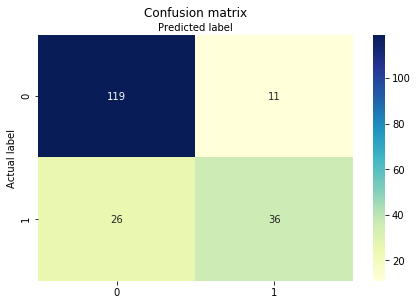

In [0]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


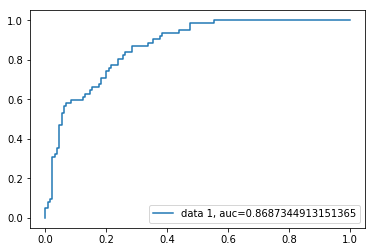

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()